In [1]:
#Machine Learning
!pip -q install plotly --upgrade
!pip -q install yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 79.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
base_credito = pd.read_csv('/content/drive/MyDrive/Bases de dados-20230224T225515Z-001/Bases de dados/credit_data.csv')

In [5]:
base_credito.shape

(2000, 5)

In [6]:
base_credito.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [7]:
base_credito.tail()

,clientid,income,age,loan,default
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


In [8]:
base_credito.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [9]:
base_credito[base_credito['income'] >=41.317159]

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [10]:
np.unique(base_credito['default'], return_counts = True)

(array([0, 1]), array([1717,  283]))

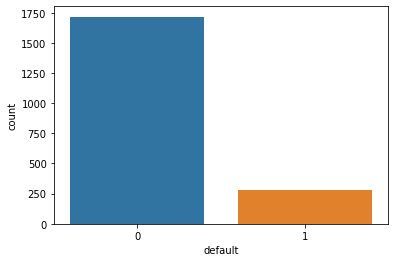

In [11]:
sns.countplot(x=base_credito['default']);

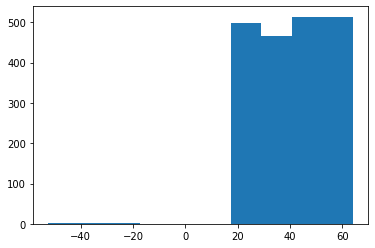

In [12]:
plt.hist(x = base_credito['age']);

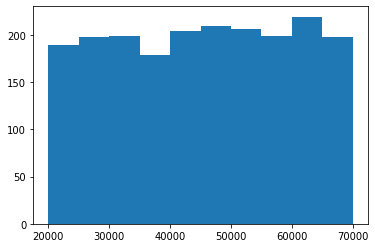

In [13]:
plt.hist( x= base_credito['income']);

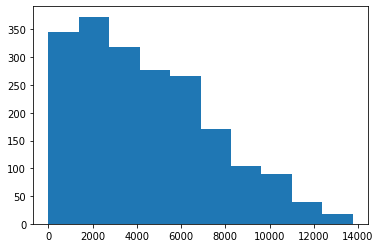

In [14]:
plt.hist( x= base_credito['loan']);

In [15]:
grafico  = px.scatter_matrix(base_credito, dimensions = ['age','income','loan'], color='default')
grafico.show()

In [16]:
base_credito.loc[base_credito['age']<0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [17]:
#Apagar somente os registros menores que zero
base_credito2 = base_credito.drop(base_credito[base_credito['age']<0].index)

In [18]:
base_credito2.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999],
           dtype='int64', length=1997)

In [19]:
base_credito2.loc[base_credito2['age']<0]

,clientid,income,age,loan,default


In [20]:
#Preencher os valores vazios
base_credito['age'][base_credito['age']>0].mean()

40.92770044906149

In [21]:
base_credito.loc[base_credito['age']<0, 'age'] = base_credito['age'][base_credito['age']>0].mean()

In [22]:
base_credito.loc[base_credito['age']<0] 

,clientid,income,age,loan,default


(array([202., 207., 196., 209., 170., 210., 202., 217., 196., 188.]),
 array([18.05518851, 22.64684924, 27.23850998, 31.83017071, 36.42183144,
        41.01349218, 45.60515291, 50.19681364, 54.78847438, 59.38013511,
        63.97179584]),
 <BarContainer object of 10 artists>)

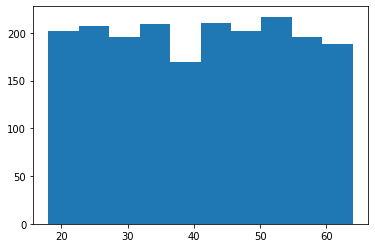

In [23]:
plt.hist(x= base_credito['age'])

In [24]:
base_credito.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [25]:
base_credito.loc[pd.isnull(base_credito['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [26]:
base_credito['age'].fillna(base_credito['age'][base_credito['age']>0].mean(),inplace=True)

In [27]:
base_credito.loc[pd.isnull(base_credito['age'])]

,clientid,income,age,loan,default


In [28]:
base_credito.loc[base_credito['clientid'].isin([29,31,32])]

,clientid,income,age,loan,default
28,29,59417.805406,40.9277,2082.625938,0
30,31,48528.852796,40.9277,6155.784670,0
31,32,23526.302555,40.9277,2862.010139,0


In [29]:
#Previsores e Class
X_credit = base_credito[['income','age','loan']].values

In [30]:
type(X_credit)

numpy.ndarray

In [31]:
y_credit = base_credito[['default']].values

In [32]:
X_credit[:, 0].min(), X_credit[:,1].min(), X_credit[:,2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [33]:
X_credit[:,0].max(), X_credit[:,1].min(),X_credit[:,2].max()

(69995.6855783239, 18.055188510566897, 13766.0512393337)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler_credt = StandardScaler()

In [35]:
X_credit = scaler_credt.fit_transform(X_credit)

In [36]:
base_census = pd.read_csv('/content/drive/MyDrive/Bases de dados-20230224T225515Z-001/Bases de dados/census.csv')

In [37]:
base_census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [38]:
base_census.shape

(32561, 15)

In [39]:
base_census.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [40]:
base_census.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [41]:
np.unique(base_census['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

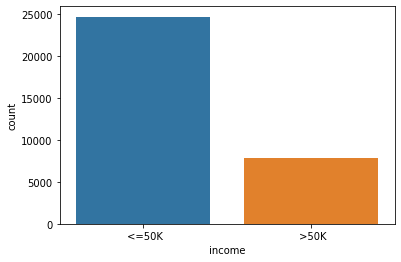

In [42]:
sns.countplot(x= base_census['income']);

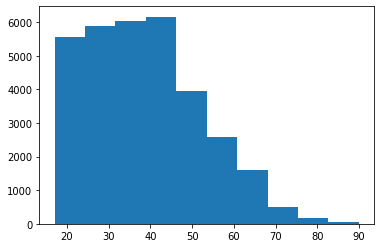

In [43]:
plt.hist(x=base_census['age']);

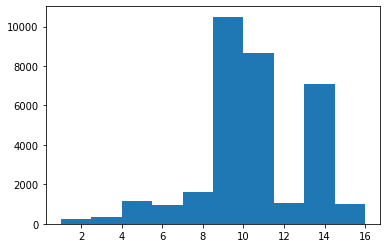

In [44]:
plt.hist(x=base_census['education-num']);

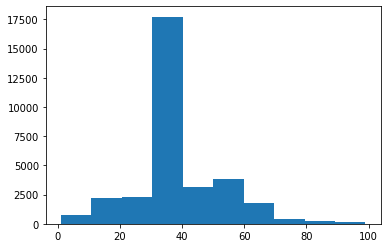

In [45]:
plt.hist(x=base_census['hour-per-week']);

In [46]:
grafico = px.treemap(base_census, path = ['workclass', 'age'])
grafico

In [47]:
grafico = px.treemap(base_census, path = ['occupation', 'relationship','age'])
grafico

In [48]:
grafico = px.parallel_categories(base_census,dimensions=['occupation', 'relationship'] )
grafico.show()

In [49]:
grafico = px.parallel_categories(base_census,dimensions=['education', 'income'] )
grafico.show()

In [50]:
#divisão entre previsores e classe
X_census = base_census.iloc[:,0:14].values

In [51]:
y_census = base_census.iloc[:,14].values

#Tratando categoricos

##Label Enconder

In [52]:
from sklearn.preprocessing import LabelEncoder
label_encoder_teste = LabelEncoder()

In [53]:
teste = label_encoder_teste.fit_transform(X_census[:,1])

In [54]:
teste

array([7, 6, 4, ..., 4, 4, 5])

In [55]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [56]:
X_census[:,1] = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_country.fit_transform(X_census[:,13])

##OnehotEncoder

In [57]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

In [58]:
onehotenconde_censu = ColumnTransformer(transformers=[('Onehot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')

In [59]:
X_census = onehotenconde_censu.fit_transform(X_census).toarray()

In [60]:
X_census.shape

(32561, 108)

##Escalonamento dos valores, para padronizar

##Base de crédito

In [61]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler() 
X_census = scaler_census.fit_transform(X_census)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_credit_treinamento, X_credit_teste, y_credit_treinamento,y_credit_teste = train_test_split(X_credit, y_credit, test_size =0.25, random_state=0)

In [64]:
X_credit_treinamento.shape

(1500, 3)

##base Census

In [65]:
X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste = train_test_split(X_census,y_census,test_size=0.15, random_state=0)

In [66]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [67]:
import pickle

In [68]:
with open( 'credit.pkl', mode ='wb') as f:
  pickle.dump([X_credit_treinamento,y_credit_treinamento,X_credit_teste,y_credit_teste],f)

In [69]:
with open( 'census.pkl', mode ='wb') as f:
  pickle.dump([X_census_treinamento,y_census_treinamento,X_census_teste,y_census_teste],f)

#Arvores de decisão

In [105]:
#random forest
#Calculo de entropia Alto =6/14, moderado =3/14, baixo = 5/14
#E(s) = -6/14*log(6/14;2)-3/14*log(3/14;2)-5/14*log(5/14;2) = 1,53
# Atributo mais importante que vai na raíz da árvore
#GAIN ou ganho(nesse exemplo fazemos o calculo da entropia para historia de crédito) = entropia anterior(1,53) - (5/14*1,37)-(5/14*1,52)-(4/14*0,810)=0,26

In [ ]:
#Bias erros por classificação errada.
#Variância, erros por sensibilidade pequena a mudanças na base de treinamento
#Pode levar a overfitting(decora demais os dados) importnate fazer a poda
# interpretação é fácil
#Não precisa de normalização ou padronização
#Rápido para classificar novos registros
#Geração de arvores complexas
#Pequenas mudanças nos dados pode mudar a arvore
#Problemas Np-completo para construir a arvore
#Upgrades como random forest, emlhoram o desempenho (usando no Kinect da microsoft)
#CART- classificantion and regression tress



In [106]:
from sklearn.tree import DecisionTreeClassifier

In [107]:
with open ('risco_credito.pkl', 'rb') as f:
  X_risco_credito, y_risco_credito = pickle.load(f)

In [108]:
X_risco_credito.shape

(14, 4)

In [109]:
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [110]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')
arvore_risco_credito.fit(X_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [111]:
arvore_risco_credito.feature_importances_

array([0.41391643, 0.06408636, 0.03885431, 0.4831429 ])

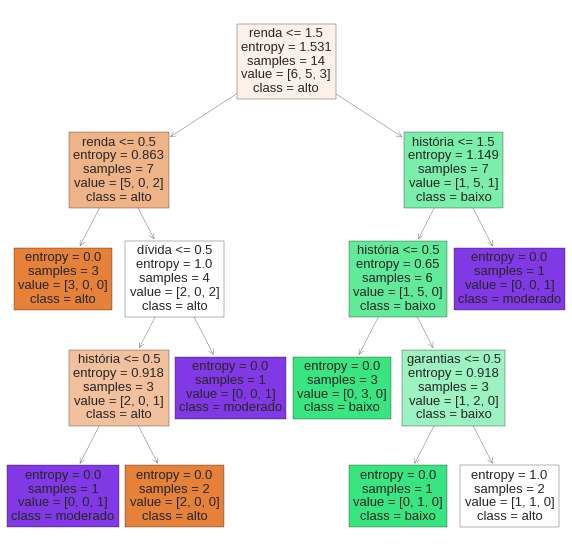

In [117]:
from sklearn import tree
previsores =['história', 'dívida','garantias','renda']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize =(10,10))
tree.plot_tree(arvore_risco_credito, feature_names = previsores, class_names = arvore_risco_credito.classes_,filled=True);

In [118]:
previsoes = arvore_risco_credito.predict([[0,0,1,2],[2,0,0,0]])
previsoes

array(['baixo', 'alto'], dtype=object)

In [119]:
with open('credit.pkl', 'rb') as f:
  X_credit_treinamento,y_credit_treinamento,X_credit_teste,y_credit_teste = pickle.load(f)

In [120]:
X_credit_treinamento.shape

(1500, 3)

In [121]:
arvore_credit = DecisionTreeClassifier(criterion='entropy',random_state=0)
arvore_credit.fit(X_credit_treinamento,y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [123]:
previsoes = arvore_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [124]:
accuracy_score(y_credit_teste,previsoes)

0.982

0.982

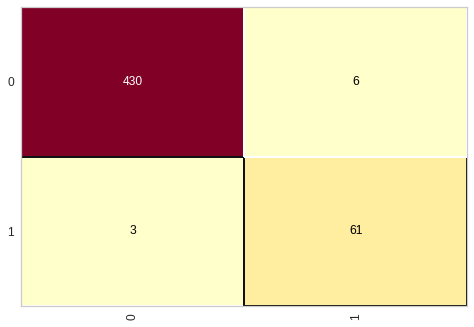

In [125]:
cm = ConfusionMatrix(arvore_credit) #Analisa de uma forma mais dinâmica
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [126]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



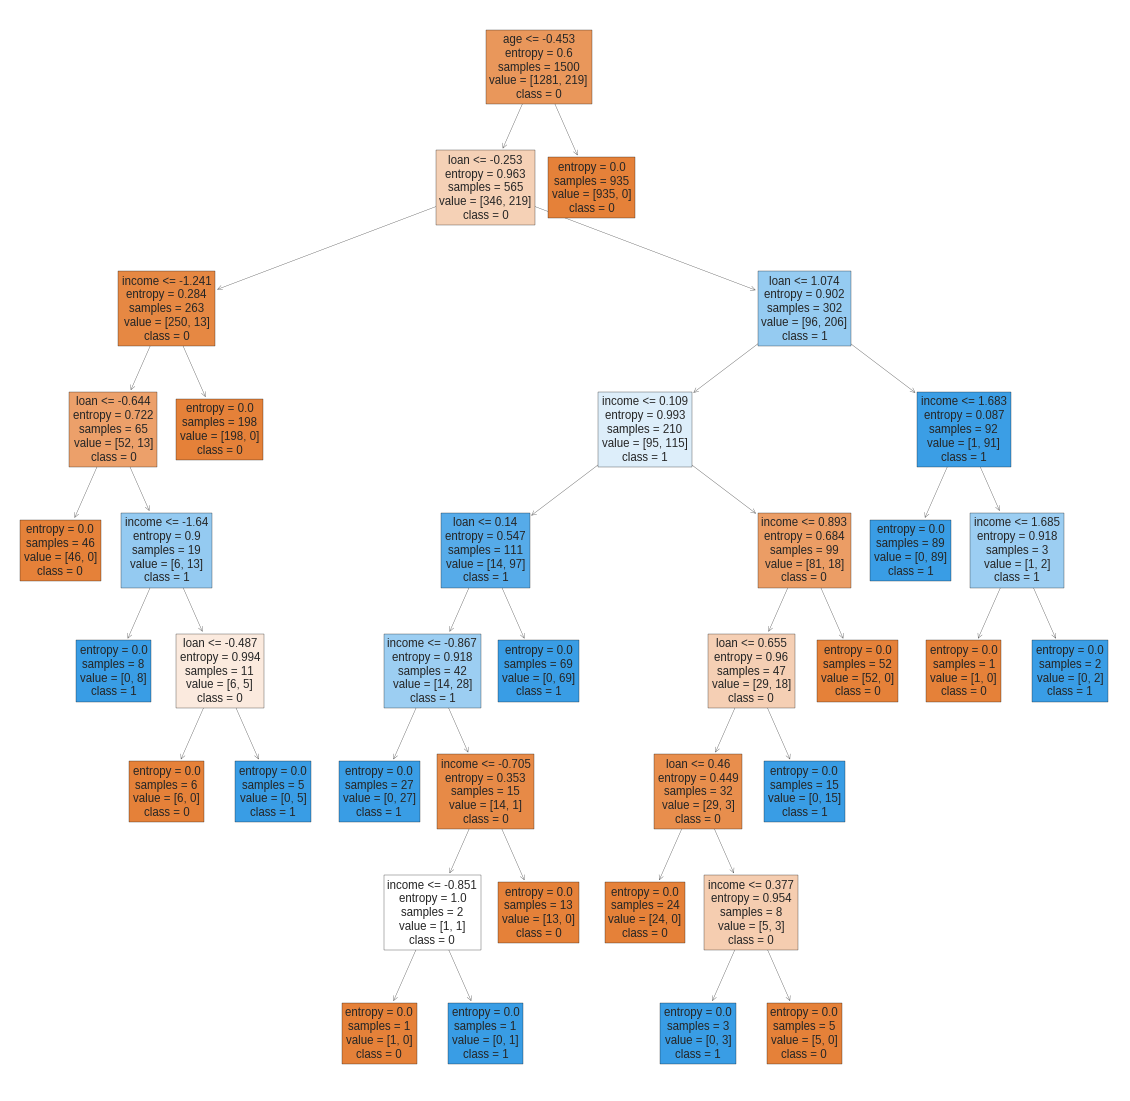

In [131]:
from sklearn import tree
previsores =['income', 'age','loan']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize =(20,20))
tree.plot_tree(arvore_credit, feature_names = previsores, class_names =['0','1'],filled=True)
plt.savefig('arvore_credit.png')

In [132]:
with open('census.pkl', 'rb') as f:
  X_census_treinamento,y_census_treinamento,X_census_teste,y_census_teste = pickle.load(f)

In [133]:
X_census_treinamento.shape

(27676, 108)

In [136]:
arvore_census = DecisionTreeClassifier (criterion = 'entropy', random_state =0)

In [137]:
arvore_census.fit(X_census_treinamento,y_census_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [138]:
previsoes = arvore_census.predict(X_census_teste)

In [139]:
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [140]:
accuracy_score(y_census_teste,previsoes)

0.8104401228249745

0.8104401228249745

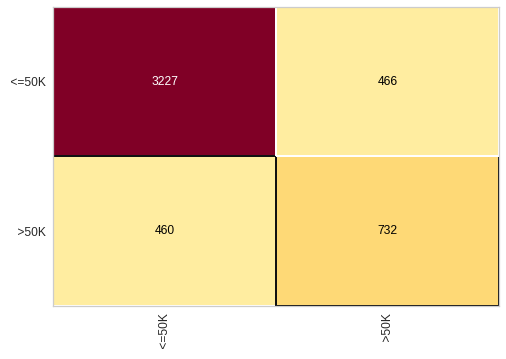

In [141]:
cm = ConfusionMatrix(arvore_census) #Analisa de uma forma mais dinâmica
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [142]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



##Random Forest

In [ ]:
#Enssemble learning, varios algoritmos juntos para construir uma arvore mais forte
#Usa a média se usar regressão ou votos da maioria para dar a resposta final
#Escolhe de forma aletória k atributos para comparação da métrica de pureza/impureza (imppureza de gini/entropia)